### 1. 生成一些类似线性模型的数据
- 添加了随机误差

In [1]:
import numpy as np
import matplotlib.pyplot as plt
m = 100  # 样本量
X = 2 * np.random.rand(m, 1)  # 取大小在区间(0, 1)上的随机数，构成一个100*1的矩阵
y = 5 + 2 * X + np.random.rand(m, 1)
plt.plot(X, y, "b.")
plt.show()
plt.savefig("linear_regression_raw_data.png", dpi=200)

### 2. 梯度下降的原始实现

#### 代价函数的计算

In [39]:
from sklearn.metrics import mean_squared_error
def L_theta(theta, X_x0, y):
#     delta = np.dot(X_x0, theta) - y  # np.dot 表示矩阵乘法
    h = np.dot(X_x0, theta) # np.dot 表示矩阵乘法
#     print(np.multiply(delta, delta).shape)
#     L_theta = np.sum(np.multiply(delta, delta))
#     L_theta = np.sum(np.square(h-y, h-y))
#     print(np.sum(np.square(h-y, h-y)))
    L_theta = mean_squared_error(h, y)
    return L_theta

#### 梯度下降的训练过程

In [40]:
T = 1000  # 迭代次数
theta = np.ones((2, 1))  # 参数的初始化
alpha = 0.06  # 学习率
X_x0 = np.c_[np.ones((100, 1)), X]  # ADD X0 = 1 to each instance

# print(np.multiply(delta, delta))

# print(L_theta)
for i in range(T):
    theta_0 = theta[0, 0]
    theta_1 = theta[1, 0]
    theta_0 -= alpha*(1/m * np.sum(np.dot(X_x0, theta) - y))
    theta_1 -= alpha*(1/m * np.sum(np.dot(np.transpose(X), np.dot(X_x0, theta) - y)))
    theta[0, 0] = theta_0
    theta[1, 0] = theta_1
    if i%100==0:
        print(L_theta(theta, X_x0, y))

23.5670382122
0.271214394197
0.11766747926
0.0920570135495
0.0877853812975
0.0870729053002
0.086954069685
0.0869342488019
0.0869309428283
0.0869303914169


In [4]:
theta  # 训练结束后得到的最优参数值

array([[ 5.51734463],
       [ 1.99964302]])

#### 训练出来的直线与原始数据的比较

In [19]:
h = np.dot(X_x0, theta)
h[:, 0]

array([ 8.91056735,  7.9056526 ,  8.71803231,  6.24130443,  7.63796979,
        7.70100739,  6.39302189,  7.00717122,  8.60789228,  8.47540423,
        6.50142199,  7.04469187,  8.41893192,  7.36974235,  7.63468195,
        5.63686937,  6.26869273,  7.0314861 ,  9.33410135,  8.89114871,
        5.96046035,  7.69933831,  8.6435759 ,  7.16627119,  6.12130508,
        8.00503705,  9.16494228,  6.81023193,  8.57565226,  5.71866054,
        7.98159823,  6.98101468,  8.37338313,  7.55596996,  6.99002493,
        5.54634809,  6.04203265,  5.87685229,  6.85220109,  8.30843187,
        8.39744705,  6.60644043,  5.72731171,  7.54434578,  8.42561826,
        5.63428094,  6.78707376,  6.77258367,  8.72514256,  8.73268356,
        6.72334955,  7.57902096,  6.55434587,  7.82968751,  8.6797761 ,
        9.07016639,  8.31611854,  7.99010376,  9.42288958,  8.45366392,
        7.01107314,  6.04370191,  7.00890141,  7.81430079,  6.9446639 ,
        5.53843246,  6.93514619,  7.22024832,  8.49309806,  5.52

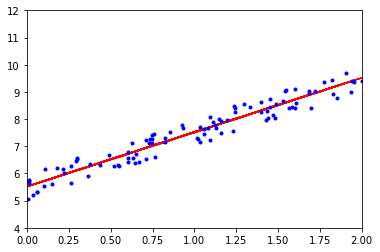

In [20]:
plt.plot(X, h[:, 0], 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 4, 12])
# plt.show()
plt.savefig("linear_regression_compare.png", dpi=200)

#### 有了训练出来的theta值，就可以用来预测新的样本点了

In [7]:
X_new = np.array([[0.5], [1.8]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)

In [8]:
print(X_new)
print(y_predict)

[[ 0.5]
 [ 1.8]]
[[ 6.51716614]
 [ 9.11670206]]


### 3. 利用向量化的梯度来实现梯度下降

In [9]:
T = 1000  # 迭代次数
theta = np.ones((2, 1))  # 参数的初始化
alpha = 0.18  # 学习率
X_x0 = np.c_[np.ones((100, 1)), X]  # ADD X0 = 1 to each instance

# print(np.multiply(delta, delta))

# print(L_theta)
for i in range(T):
    h = np.dot(X_x0, theta)
    theta -= alpha * 1/m * np.dot(X_x0.T, h - y)
    if i%100==0:
        print(L_theta(theta, X_x0, y))

1236.59090091
9.16385213713
8.69510863518
8.69303729717
8.6930281441
8.69302810365
8.69302810347
8.69302810347
8.69302810347
8.69302810347


In [10]:
theta

array([[ 5.51761253],
       [ 1.99940983]])

### 4. 利用sk-learn工具包来实现线性回归

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[ 5.51761253] [[ 1.99940983]]


- 利用训练的线性模型预测新的样本点

In [12]:
print(lin_reg.predict(X_new))

[[ 6.51731745]
 [ 9.11655023]]
